In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
parse_dates = ['lasthandled', 'firstseentimestamp']
df = pd.read_csv('./data/prd45.csv',
                     parse_dates=parse_dates
                   )
df.head()

,case_oid,lasthandled,firstseentimestamp,status
0,1719575850377,2024-06-28 14:00:16.587,2024-06-28 13:57:44.877,URI_DOWNLOADED
1,1719579946152,NaT,2024-06-28 15:05:58.938,URI_ENCOUNTERED
2,1719575850377,2024-06-28 14:02:06.125,2024-06-28 13:57:57.363,URI_DOWNLOADED
3,1719579945831,2024-06-28 15:07:56.192,2024-06-28 15:06:03.266,URI_DOWNLOADED
4,1719575850377,2024-06-28 14:03:37.800,2024-06-28 13:57:59.900,URI_DOWNLOADED


In [3]:
df.status.unique()

array(['URI_DOWNLOADED', 'URI_ENCOUNTERED', 'URI_REJECTED', 'URI_RETRY'],
      dtype=object)

In [4]:
df.status.value_counts()

status
URI_DOWNLOADED     1236434
URI_REJECTED         93883
URI_ENCOUNTERED      16389
URI_RETRY              154
Name: count, dtype: int64

In [5]:
df['date_diff'] = df.apply(lambda row: row['lasthandled'] - row['firstseentimestamp'], axis = 1)
df

,case_oid,lasthandled,firstseentimestamp,status,date_diff
0,1719575850377,2024-06-28 14:00:16.587,2024-06-28 13:57:44.877,URI_DOWNLOADED,0 days 00:02:31.710000
1,1719579946152,NaT,2024-06-28 15:05:58.938,URI_ENCOUNTERED,NaT
2,1719575850377,2024-06-28 14:02:06.125,2024-06-28 13:57:57.363,URI_DOWNLOADED,0 days 00:04:08.762000
3,1719579945831,2024-06-28 15:07:56.192,2024-06-28 15:06:03.266,URI_DOWNLOADED,0 days 00:01:52.926000
4,1719575850377,2024-06-28 14:03:37.800,2024-06-28 13:57:59.900,URI_DOWNLOADED,0 days 00:05:37.900000
...,...,...,...,...,...
1346855,1719575850377,2024-06-28 13:59:36.554,2024-06-28 13:57:43.270,URI_DOWNLOADED,0 days 00:01:53.284000
1346856,1719576752821,2024-06-28 14:13:27.728,2024-06-28 14:12:36.863,URI_DOWNLOADED,0 days 00:00:50.865000
1346857,1719575850377,2024-06-28 14:05:18.834,2024-06-28 13:57:52.478,URI_DOWNLOADED,0 days 00:07:26.356000
1346858,1719575850377,2024-06-28 14:01:00.589,2024-06-28 13:57:52.536,URI_DOWNLOADED,0 days 00:03:08.053000


In [6]:
df.dtypes

case_oid                        int64
lasthandled            datetime64[ns]
firstseentimestamp     datetime64[ns]
status                         object
date_diff             timedelta64[ns]
dtype: object

In [7]:
date_diffs = pd.DataFrame({ 'diff': df.date_diff.dropna() })
date_diffs

,diff
0,0 days 00:02:31.710000
2,0 days 00:04:08.762000
3,0 days 00:01:52.926000
4,0 days 00:05:37.900000
5,0 days 00:05:15.552000
...,...
1346855,0 days 00:01:53.284000
1346856,0 days 00:00:50.865000
1346857,0 days 00:07:26.356000
1346858,0 days 00:03:08.053000


In [8]:
date_diffs.describe()

,diff
count,1097347
mean,0 days 00:14:01.627893480
std,0 days 01:32:29.991239658
min,0 days 00:00:00.075000
25%,0 days 00:00:52.327500
50%,0 days 00:03:06.486000
75%,0 days 00:11:51.296500
max,61 days 23:40:43.861000


In [9]:
max_timedelta = datetime.timedelta(minutes=3)
date_diffs.iloc[0] <= max_timedelta

diff    True
Name: 0, dtype: bool

In [10]:
date_diffs_matching_conditions = date_diffs.loc[date_diffs['diff'] <= max_timedelta]
date_diffs_matching_conditions

,diff
0,0 days 00:02:31.710000
3,0 days 00:01:52.926000
10,0 days 00:01:59.537000
18,0 days 00:00:16.053000
24,0 days 00:00:21.787000
...,...
1346852,0 days 00:00:03.960000
1346853,0 days 00:01:51.143000
1346854,0 days 00:00:45.067000
1346855,0 days 00:01:53.284000


In [11]:
def get_duration_category(timedelta) -> str:
    if pd.isnull(timedelta):
        return 'n'
    if timedelta < datetime.timedelta(minutes=1):
        return 'a'
    elif timedelta < datetime.timedelta(minutes=2):
        return 'b'
    elif timedelta < datetime.timedelta(minutes=3):
        return 'c'
    elif timedelta < datetime.timedelta(minutes=4):
        return 'd'
    elif timedelta < datetime.timedelta(minutes=5):
        return 'e'
    return 'f'

#print(type(date_diffs.iloc[0].item()))
get_duration_category(date_diffs.iloc[0].item())

'c'

In [12]:
df['date_diff_cat'] = df.apply(lambda row: get_duration_category(row['date_diff']), axis = 1)
df.tail()

,case_oid,lasthandled,firstseentimestamp,status,date_diff,date_diff_cat
1346855,1719575850377,2024-06-28 13:59:36.554,2024-06-28 13:57:43.270,URI_DOWNLOADED,0 days 00:01:53.284000,b
1346856,1719576752821,2024-06-28 14:13:27.728,2024-06-28 14:12:36.863,URI_DOWNLOADED,0 days 00:00:50.865000,a
1346857,1719575850377,2024-06-28 14:05:18.834,2024-06-28 13:57:52.478,URI_DOWNLOADED,0 days 00:07:26.356000,f
1346858,1719575850377,2024-06-28 14:01:00.589,2024-06-28 13:57:52.536,URI_DOWNLOADED,0 days 00:03:08.053000,d
1346859,1719575850377,2024-06-28 14:05:11.110,2024-06-28 13:57:53.368,URI_DOWNLOADED,0 days 00:07:17.742000,f


In [13]:
date_diffs_cats = df.date_diff_cat
date_diffs_cats.value_counts()

date_diff_cat
f    447815
a    299544
n    249513
b    149894
c     90762
d     66074
e     43258
Name: count, dtype: int64

(array([ 90762., 249513.,      0.,  43258.,      0., 149894., 447815.,
             0., 299544.,  66074.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

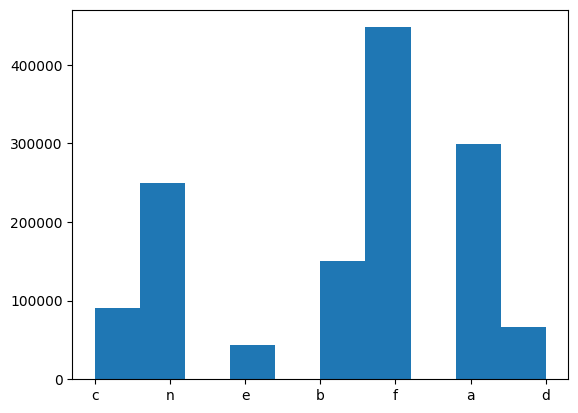

In [14]:
plt.hist(date_diffs_cats)

In [15]:
def get_year_month(dt) -> str:
    return dt.strftime('%Y-%m')

get_year_month(datetime.date.today())

'2025-09'

In [16]:
df['date_ym'] = df.apply(lambda row: get_year_month(row['firstseentimestamp']), axis = 1)
df

,case_oid,lasthandled,firstseentimestamp,status,date_diff,date_diff_cat,date_ym
0,1719575850377,2024-06-28 14:00:16.587,2024-06-28 13:57:44.877,URI_DOWNLOADED,0 days 00:02:31.710000,c,2024-06
1,1719579946152,NaT,2024-06-28 15:05:58.938,URI_ENCOUNTERED,NaT,n,2024-06
2,1719575850377,2024-06-28 14:02:06.125,2024-06-28 13:57:57.363,URI_DOWNLOADED,0 days 00:04:08.762000,e,2024-06
3,1719579945831,2024-06-28 15:07:56.192,2024-06-28 15:06:03.266,URI_DOWNLOADED,0 days 00:01:52.926000,b,2024-06
4,1719575850377,2024-06-28 14:03:37.800,2024-06-28 13:57:59.900,URI_DOWNLOADED,0 days 00:05:37.900000,f,2024-06
...,...,...,...,...,...,...,...
1346855,1719575850377,2024-06-28 13:59:36.554,2024-06-28 13:57:43.270,URI_DOWNLOADED,0 days 00:01:53.284000,b,2024-06
1346856,1719576752821,2024-06-28 14:13:27.728,2024-06-28 14:12:36.863,URI_DOWNLOADED,0 days 00:00:50.865000,a,2024-06
1346857,1719575850377,2024-06-28 14:05:18.834,2024-06-28 13:57:52.478,URI_DOWNLOADED,0 days 00:07:26.356000,f,2024-06
1346858,1719575850377,2024-06-28 14:01:00.589,2024-06-28 13:57:52.536,URI_DOWNLOADED,0 days 00:03:08.053000,d,2024-06


In [17]:
date_yms = df.date_ym
date_yms.value_counts()

date_ym
2025-03    276330
2024-12    226237
2025-04    195294
2024-07    144133
2024-11    102360
2025-01     98788
2024-08     97158
2024-09     72546
2025-02     60958
2024-10     41430
2024-06     31626
Name: count, dtype: int64

In [18]:
df_pivot = df.pivot_table(index='date_ym',columns='date_diff_cat',values='case_oid',aggfunc='count')
df_pivot

date_diff_cat,a,b,c,d,e,f,n
date_ym,,,,,,,
2024-06,10659,6026,4275,1723,442,675,7826
2024-07,45890,24543,9511,5656,3715,23079,31739
2024-08,29798,12087,5907,4016,3408,19176,22766
2024-09,26067,9360,4061,2614,2163,9415,18866
2024-10,19277,5559,1691,1109,619,3219,9956
2024-11,21939,7507,3971,1537,1184,44461,21761
2024-12,26231,17512,14877,13569,5533,102144,46371
2025-01,30535,17290,10921,9902,6198,11575,12367
2025-02,18198,10298,7641,4041,2353,9941,8486


In [19]:
# analysis: next steps
# Why no 2025-04?
# Are you sure that get_year_month is correct?
# Are you sure that get_duration_category is correct?
# Too many 'f' in 2024-12 and 2025-03

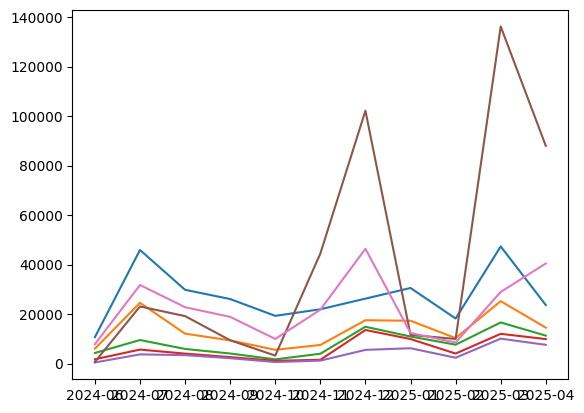

In [20]:
plt.plot(df_pivot)